Dataset and problem statement: "https://archive.ics.uci.edu/ml/datasets/Statlog+%28Shuttle%29" <br>
<br>
$ \underline{\text{Reference}}: $ <br>
Title: "Neural Networks from Scratch in Python" <br>
Authors: Harrison Kinsley & Daniel Kukieła <br>
Publisher: Harrison Kinsley, 2020

# $\underline{\text{Libraries \& global contants}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
font = {'fontname':'AppleGothic'}

# Open and read file
trainingFile = open('shuttle.trn','r')
lines = trainingFile.readlines()
batch = np.zeros((len(lines),9))
classfy = np.zeros(len(lines))

# Set up input as a 2d array
for i in range(len(lines)):
    temp_str = lines[i].split(' ')
    classfy[i] = int(temp_str[-1])
    for j in range(9):
        batch[i,j] = int(temp_str[j])
        
# Change category counting to start from 0 and convert to int
classfy = np.asarray(classfy, dtype = 'int') - 1

# Open and read file
test_file = open('shuttle.tst','r')
lines_tst = test_file.readlines()
batch_tst = np.zeros((len(lines_tst),9))
classfy_tst = np.zeros(len(lines_tst))

# Set up input as a 2d array
for i in range(len(lines_tst)):
    temp_str = lines_tst[i].split(' ')
    classfy_tst[i] = int(temp_str[-1])
    for j in range(9):
        batch_tst[i,j] = int(temp_str[j])

# Change category counting to start from 0 and convert to int
classfy_tst = np.asarray(classfy_tst, dtype = 'int') - 1

# $\underline{\text{Plotting Functions}}$

In [3]:
# Plot accuracy error for a single model
def plot_acc_error(arr,title):
    num_plots = arr.shape[0]
    len = arr.shape[1]
    fig,ax = plt.subplots()
    for i in range(num_plots):
        ax.plot(np.array(range(0,len)),1-np.array(arr)[i],color='darkorange',linewidth=0.6)
        
    ax.set_title(title,**font,color='aliceblue')
    ax.set_ylabel("Percentage error",**font,color='aliceblue')
    ax.set_xlabel('Epochs',**font,color='aliceblue')

    ax.set_yscale("log")
    ax.set_facecolor('dimgray')
    fig.set_facecolor('dimgray')

    ax.tick_params(axis='y', colors='aliceblue')
    ax.tick_params(axis='x', colors='aliceblue')
    ax.spines['bottom'].set_color('aliceblue')
    ax.spines['left'].set_color('aliceblue')
    ax.spines['top'].set_color('dimgray')
    ax.spines['right'].set_color('dimgray')

    plt.show()

In [8]:
# Plots accuracy error for 4 models for comparison reasons
def subplots_acc_error(arrays,titles):
    unused, num_models,num_epochs = arrays.shape
    epochs = np.array(range(0,num_epochs))
    fig,axs = plt.subplots(2,2, figsize=(10,10))
    for k in range(num_models):
        iter = 0
        for i in range(2):
            for j in range(2):
                # 1 - arrays[k] in order to get a percentage error
                axs[i, j].plot(epochs,1-arrays[iter,k],color='darkorange',linewidth=0.6)
                axs[i, j].set_title(titles[iter+1],**font,color='aliceblue')
                iter += 1

    fig.suptitle(titles[0],**font,color='aliceblue')
    fig.set_facecolor('dimgray')

    for ax in axs.flat:
        ax.set_yscale('log')
        ax.set_ylabel("Percentage error",**font,color='aliceblue')
        ax.set_xlabel('Epochs',**font,color='aliceblue')
        ax.set_facecolor('dimgray')
        ax.tick_params(axis='y', colors='aliceblue')
        ax.tick_params(axis='x', colors='aliceblue')
        ax.spines['bottom'].set_color('aliceblue')
        ax.spines['left'].set_color('aliceblue')
        ax.spines['top'].set_color('dimgray')
        ax.spines['right'].set_color('dimgray')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

# $\underline{\text{Fully Connected Layer}}$
 $\underline{\text{Forward Function}}$: $ \hspace{9cm} $ <br> 
<br>
$F(a)=\bold{a} \cdot x_0^T+x_1 \hspace{9cm}  $ <br>
$\text{Here, } x_0 \text{ corresponds to the weights and } x_1 \text{ to the biases and } a \text{ corresponding to the 9 attributes recorded from the shuttle.}$   <br>
<br>
$ \underline{\text{Partial derivatives of L1 and L2}} $ <br>
$ L'_1(\bold{x}) = \lambda \begin{cases}1&{\text{if }}x_i>0,\\-1&{\text{if }x_i\le0}.\end{cases}  \hspace{4cm} L'_2(\bold{x})=2\lambda x_i$ <br>
$ \text{Where the input } \bold{x} \text{ is either the weights or the biases and } i \text{ is the index of these inouts} $

In [4]:
class Layer_FC: # Dense/fully connected

    def __init__(self,num_inputs,num_neurons,w_l1=0,w_l2=0,b_l1=0,b_l2=0):
        self.w = 0.01*np.random.randn(num_inputs,num_neurons)
        self.b = np.zeros((1,num_neurons))
        # Set regularization strength
        self.w_l1 = w_l1
        self.w_l2 = w_l2
        self.b_l1 = b_l1
        self.b_l2 = b_l2


    def forward(self,inputs):
        self.inputs = inputs
        self.output = np.dot(inputs,self.w) + self.b

    def backward(self,dvalues):
        # dvalues is the derivative from the next layer
        # Gradients on parameters
        self.dw = np.dot(self.inputs.T, dvalues)
        self.db = np.sum(dvalues,axis=0,keepdims=True)
        # Gradients on regularization
        if self.w_l1 > 0:
            dL1 = np.ones_like(self.w)
            dL1[self.w < 0] = -1
            self.dw += 2*self.w_l1*dL1
        
        if self.w_l2 > 0:
            self.dw += 2*self.w_l2*self.w
        
        if self.b_l1 > 0:
            dL1 = np.ones_like(self.b)
            dL1[self.b < 0] = -1
            self.db += 2*self.b_l1*dL1

        if self.b_l2 > 0:
            self.db += 2*self.b_l2*self.b

        # Gradient on values
        self.dinputs = np.dot(dvalues,self.w.T)

# Dropout Layer Regularization
class Layer_Dropout:

    def __init__(self,rate):
        # Success rate:
        self.rate = 1 - rate

    def forward(self,inputs):
        # Save input values
        self.inputs = inputs
        # Generate and save scale mask
        self.binary_mask = np.random.binomial(1,self.rate,size=inputs.shape)/self.rate
        # Apply mask to output
        self.output = inputs*self.binary_mask

    def backward(self,dvalues):
        # Fradient on values
        self.dinputs = dvalues*self.binary_mask
    

# $\underline{\text{Activation Functions - Rectilinear and Softmax}}$

$ \underline{\text{Rectified Linear activation}}: \hspace{2cm} \underline{\text{Softmax}}: $<br>
$\displaystyle f(x)={\begin{cases}x&{\text{if }}x>0,\\0&{\text{if }x\le0}.\end{cases}}$ $\hspace{3cm} S_{i,j}=e^{z_i,j} /[ \sum \limits_{l=1}^{L}e^{z_i,l}]$ <br>
$\hspace{6cm}$ Softmax returns a probability distribution for each class <br>
<br> 
<br>
$ \underline{\text{Derivative of ReLU activation}}: \hspace{2cm} \underline{\text{Derivative of Softmax}}: $<br>
$ \displaystyle \frac{df}{dx} ={\begin{cases}1&{\text{if }}x>0,\\0&{\text{if }x\le0}.\end{cases}} \hspace{4cm} \frac{\partial S_{i,j}}{\partial z_{i,k}} = {\begin{cases}S_{i,j}\cdot (1-S_{i,k})&{\text{if }}j=k,\\-S_{i,j}\cdot S_{i,k}&{\text{if }j\neq k}.\end{cases}} = S_{i,j}\cdot (\delta_{j,k}-S_{i,k})$

In [6]:
# Rectified linear activation function
class Activation_ReLU:

    def forward(self,inputs):
        self.inputs = inputs
        self.output = np.maximum(0,inputs)

    # Derivative of ReLU
    def backward(self,dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation for classification
class Activation_Softmax:

    def forward(self,inputs):
        # We take the subtraction of the max of the inputs to avoid "exploding values" and "dead neurons"
        exps = np.exp(inputs - np.max(inputs,axis=1,keepdims=True)) 
        probabilities = exps/np.sum(exps,axis=1,keepdims=True)
        self.output = probabilities

    def backward(self,dvalues):
        # Uninitialised array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index,(single_output,single_dvalues) in enumerate(zip(self.output,dvalues)):
            # Flatten output array 
            single_output = single_output.reshape(-1,1)  # coloumn matrix
            jacobian = np.diagflat(single_output) - np.dot(single_output,single_output.T)
            # Calculate the sample-wise gradient and add to array of sample gradients
            self.dinputs[index] = np.dot(jacobian,single_dvalues)

# $\underline{\text{Loss Functions}}$

$\underline{\text{Categorical Cross-Entropy}}:  \hspace{7cm} \underline{\text{Derivative of Categorical Cross-Entropy}}:$ <br>
<br>
$L_{i,j}=-\sum \limits_{j}y_{i,j}\log(\hat{y}_{i,j}) \hspace{8cm} \frac{\partial L_i}{\partial \hat{y}_{i,j}}=-\frac{y_{i,j}}{\hat{y}_{i,j}}$ <br>
<br>
Where $i$ is the $i^{\text{th}}$ sample and $j$ is the index of the lables. <br> 
$y_{i,j}$ is the actual/true prediction while $\hat{y}$ is the predicted value. <br>
<br>
In this cases, we just take the log <br>
$L_i = - \log(\hat{y}_{i,k})$ where $k$ is the index of the true solution. <br>
<br>
$ \underline{\text{Derivative of Categorical Cross-Entropy loss function w.r.t Softmax inputs}} $ <br>
<br>
$ \frac{\partial L_i}{\partial z_{i,k}} = \hat{y}_{i,k}-y_{i,k}  $

In [7]:
class Loss:
    
    # Calculates mean value of all sample losses, given model output and ground truth
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
    def regularization_loss(self,layer):
        # Initialise reg_loss
        reg_loss = 0

        # Calculates reg_loss if respective regulariztion strengths are greater than zero
        if layer.w_l1 > 0:
            reg_loss += layer.w_l1*np.sum(np.abs(layer.w))
        
        if layer.w_l2 > 0:
            reg_loss += layer.w_l2*np.sum(layer.w**2)

        if layer.b_l1 > 0:
            reg_loss += layer.b_l1*np.sum(np.abs(layer.b))
        
        if layer.b_l2 > 0:
            reg_loss += layer.b_l2*np.sum(layer.b**2)

        return reg_loss

# Inherits Loss
class Loss_CategoricalCrossEntropy(Loss): 
    
    def forward(self,y_pred,y_true):
        samples = len(y_pred)
        # CLip to prevent division by zero and clip both sides to drage mean to any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped* y_true,
                axis=1
            )
        # Losses
        negative_log_probabs = -np.log(correct_confidences)
        return negative_log_probabs
    
    def backward(self, dvalues, y_true): ### We gonna only use one sample... use integer encoding 
        samples = len(dvalues)
        # Number of labels in every sample, we use the first one to count ????
        lables = len(dvalues[0])
        # If lables are sparse, turn them into one-hot vector??
        if len(y_true.shape) == 1:
            y_true = np.eye(lables)[y_true]
        # Calculate gradient
        self.dinputs = -y_true/dvalues
        # Normalise gradient
        self.dinputs = self.dinputs/samples


class Activation_Softmax_Loss_CategoryCrossEntropy():

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossEntropy()
        
    def forward(self,inputs,y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        self.output = self.activation.output 
        # Calculate and return loss value
        return self.loss.calculate(self.output,y_true)
    
    def backward(self, dvalues, y_true): ### We gonna only use one sample... use integer encoding 
        samples = len(dvalues)
        # If lables are one-hot encoded, turn them  into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples),y_true] -= 1
        # Normalise gradient
        self.dinputs = self.dinputs/samples

# $ \underline{\text{Minimisation Methods}}: $
Regular line-search with decaying step: <br>
$\bold{x}^{k+1}=\bold{x}^{k}+s^k \bold{d}^k$ <br>
$s^{k+1}=s^{k}(1+\alpha k)^{-1}$<br>
$ \text{where} \bold{x} \text{ are the domain values (weights and biases), } s \text{ is the step-size (learning rate) at iteration } k,  \alpha \text{ is the decay rate and } \bold{d}^k = -\nabla(f(\bold{x}^k))$ <br>

In [8]:
# Minimiser using line-search methods
class Optimizer:
    # Learning rate: stepsize = s
    # decay: reducing factor of stepsize (decay)

    # Call once, before any parameter update
    def pre_update_params(self):
        # Checks if decay is not zero
        if self.decay:
            self.current_step = self.current_step*(1/(1 + self.decay * self.iterations))

    def post_update(self):
        self.iterations += 1

#### $ \underline{\text{Stochastic Gradient Descent}} $
$ \text{SGD with momentum:} $ <br>
$\bold{p^{k+1}} = \gamma \bold{p}^{k} +s^k \bold{d}^k$ <br>
$\bold{x}^{k+1}=\bold{x}^{k} + \bold{p}^k$ <br>
$\gamma \text{ is the fraction of previous search direction, with the momentums of the inputs correspond to } \bold{p}^k. \text{Initially,} \bold{p}^0=\bold{0}$ <br>

In [9]:
# Inherits 'Optimizer'
class SGD(Optimizer):

    def __init__(self, step=0.02, decay=0, momentum=0.2):
        self.step = step
        self.current_step = step
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def update_params(self,layer):
        # if we decide to select a momentum that is not zero
        if self.momentum:
            # The update contains a portion of the gradient from preceding steps as our momentum (direction of previous changes) 
            # and only a portion of the current gradient; together, these portions form the actual change to our parameters
    
            # If layer does not contain momentum arrays, create them filled with zeros of same shape as layer
            if not hasattr(layer,'w_momentums'):
                layer.w_momentums = np.zeros_like(layer.w)
                layer.b_momentums = np.zeros_like(layer.b)
            # Build weight update with momentum
            w_update = self.momentum*layer.w_momentums - self.current_step*layer.dw
            layer.w_momentums = w_update
            # Build bias update 
            b_update = self.momentum*layer.b_momentums - self.current_step*layer.db
            layer.b_momentums = b_update 
        # Vanilla SGD, without momentum
        else: 
            w_update = -self.current_step*layer.dw
            b_update = -self.current_step*layer.db
        # Update weight and biases
        layer.w += w_update
        layer.b += b_update


#### $ \underline{\text{AdaGrad}} $
$ \bold{c}^k = \sum \limits_{i=1}^k (\bold{d}^k)^2 $ <br>
$\bold{x}^{k+1}=\bold{x}^{k} + s^k\bold{d}^k[\sqrt{\bold{c}^k + \epsilon}]^{-1} $ <br>
$ \bold{c}^k \text{corresponds to a } cache  \text{ where we sum the square of all previous gradients.} $

In [10]:
class AdaGrad(Optimizer):

    def __init__(self, step=0.02, decay=0, ε=1e-7):
        self.step = step
        self.current_step = step
        self.decay = decay
        self.iterations = 0
        self.ε = ε

    def update_params(self,layer):   
        # If layer does not contain momentum arrays, create them filled with zeros of same shape as layer, same for bias_momentum
        if not hasattr(layer,'w_cache'):
            layer.w_cache = np.zeros_like(layer.w)
            layer.b_cache = np.zeros_like(layer.b)
        # Update cache with squared current gradients
        layer.w_cache += layer.dw**2
        layer.b_cache += layer.db**2
        # Vanilla SGD param update + normalisation with square root cache
        layer.w += -self.current_step*layer.dw/(np.sqrt(layer.w_cache)+self.ε)
        layer.b += -self.current_step*layer.db/(np.sqrt(layer.b_cache)+self.ε)
    

#### $ \underline{\text{Root Mean Square Propagation}}  $

$ \bold{c}^{k+1} = \alpha \bold{c}^k + (1 - \alpha) \bold{d}^k \bold{d}^{k^T} $ <br>
$\bold{x}^{k+1}=\bold{x}^{k} + s^k\bold{d}^k[\sqrt{\bold{c}^k + \varepsilon}]^{-1} $ <br>
$ \text{Involves a moving average of the } cache\text{. Each update to the cache retains a part of the cache and updates it with a fraction of the new, squared, gradients} $

In [11]:
class RMSProp(Optimizer):

    def __init__(self, step=0.001, decay=1e-10, ε=1e-7, α=0.9):
        self.current_step = step
        self.step = step
        self.decay = decay
        self.iterations = 0
        self.ε = ε 
        self.α = α
    
    def update_params(self,layer):
        if not hasattr(layer,'w_cache'):
            layer.w_cache = np.zeros_like(layer.w)
            layer.b_cache = np.zeros_like(layer.b)
        layer.w_cache = self.α*layer.w_cache + (1 - self.α)*layer.dw**2
        layer.b_cache = self.α*layer.b_cache + (1 - self.α)*layer.db**2

        layer.w += -self.current_step*layer.dw/(np.sqrt(layer.w_cache) + self.ε)
        layer.b += -self.current_step*layer.db/(np.sqrt(layer.b_cache) + self.ε)

#### $ \underline{\text{Adam}}  $
$ \text{Adds momentum to RMSprop} $ <br>
$ \bold{p}^{k+1} = \frac{\beta_1 \bold{p}^k + (1-\beta_1)\nabla f(\bold{x}^k)}{1-\beta_1^{k+1}} $ <br>
<br>
$ \bold{c}^{k+1} = \frac{\beta_2 \bold{c}^k + (1-\beta_2)[\nabla f(\bold{x}^k)]^2}{1-\beta_2^{k+1}} $ <br> 
<br>
$ \bold{x}^{k+1}=\bold{x}^{k} + s^k\bold{p}^k[\sqrt{\bold{c}^k + \varepsilon}]^{-1} $ <br>

In [12]:
class Adam(Optimizer):

    def __init__(self, step=0.001, decay=1e-10, ε=1e-7, β_1=0.9,β_2=0.999):
        self.current_step = step
        self.step = step
        self.decay = decay
        self.iterations = 0
        self.ε = ε 
        self.β_1 = β_1
        self.β_2 = β_2
    
    def update_params(self,layer):
        if not hasattr(layer,'w_cache'):
            layer.w_momentums = np.zeros_like(layer.w)
            layer.b_momentums = np.zeros_like(layer.b)
            layer.w_cache = np.zeros_like(layer.w)
            layer.b_cache = np.zeros_like(layer.b)
        # Update momentum with current gradients
        layer.w_momentums = self.β_1*layer.w_momentums + (1 - self.β_1)*layer.dw
        layer.b_momentums = self.β_1*layer.b_momentums + (1 - self.β_1)*layer.db
        # Corrected momentum
        w_momentums_corrected = layer.w_momentums/(1 - self.β_1**(self.iterations + 1))
        b_momentums_corrected = layer.b_momentums/(1 - self.β_1**(self.iterations + 1))
        # Update cache with square current gradients
        layer.w_cache = self.β_2*layer.w_cache + (1 - self.β_2)*layer.dw**2
        layer.b_cache = self.β_2*layer.b_cache + (1 - self.β_2)*layer.db**2
        # Corrected cache
        w_cache_corrected = layer.w_cache/(1 - self.β_2**(self.iterations + 1))
        b_cache_corrected = layer.b_cache/(1 - self.β_2**(self.iterations + 1))

        layer.w += -self.current_step*w_momentums_corrected/(np.sqrt(w_cache_corrected) + self.ε)
        layer.b += -self.current_step*b_momentums_corrected/(np.sqrt(b_cache_corrected) + self.ε)

# $ \underline{\text{Setting up the Model}} $

In [16]:
class Model():
    # Define whatever hyperparameters you'd like
    # We use 13 becasue 12=2/3*attributes + num_classes
    def __init__(self,hidden_neurons = 13):
        # Define number of attributes as well as number of neurons in the hidden layer
        self.input_layer = Layer_FC(9,hidden_neurons)
        # Activation function for the first layer
        self.activation1 = Activation_ReLU()
        # Dropout layer with probability of disabling neurons
        self.dropout1 = Layer_Dropout(0)
        # Define the final layer with outputs taking these values [0,1,2,3,4,5,6]
        self.layer2 = Layer_FC(hidden_neurons,7)
        # Loss function to calcluate from activation function
        self.loss_activation = Activation_Softmax_Loss_CategoryCrossEntropy()
            

# $ \underline{\text{Training Model Function}} $
Takes as an input the class of the optimisation method to use as well as number of models to train and then returns the array of accuracies for 51 epochs as well as the last model that was trained.

In [17]:
def train_model(method,num_models=10):
    # Initialise num of models and storage array
    acc_array = np.zeros((num_models,51))
    # Will create num_models number of models
    for k in range(num_models):
        model = Model()
        # Optimizer object created
        optimizer = method()
        for epoch in range(5001):
            # Forward pass, for activation function too
            model.input_layer.forward(batch)
            model.activation1.forward(model.input_layer.output)
            # Apply drop out mask 
            model.dropout1.forward(model.activation1.output)
            # Forward pass on second layer, input is output of first layer (the activation output)
            model.layer2.forward(model.dropout1.output)
            # Forward pass through activation/loss function 
            # Takes output of second layer and returns loss
            loss = model.loss_activation.forward(model.layer2.output,classfy)
            # Calculates regularization loss and adds to overall loss
            reg_loss = model.loss_activation.loss.regularization_loss(model.input_layer) + model.loss_activation.loss.regularization_loss(model.layer2)
            loss += reg_loss
            # Calculate the accuracy from output of activation2 and targets, for each row
            predictions = np.argmax(model.loss_activation.output,axis=1)

            accuracy = np.mean(predictions==classfy)
            if not epoch % 100:
                acc_array[k,epoch//100] = accuracy    
                # print(f'epoch:{epoch},'+
                #       f'acc:{accuracy},'+
                #       f'loss:{loss:.3f},'+
                #       f'lr:{optimizer.current_step}')
            # Backward pass
            model.loss_activation.backward(model.loss_activation.output,classfy)
            model.layer2.backward(model.loss_activation.dinputs)
            model.dropout1.backward(model.layer2.dinputs)
            model.activation1.backward(model.dropout1.dinputs)
            model.input_layer.backward(model.activation1.dinputs)
            # Update weights and biases
            optimizer.pre_update_params()
            optimizer.update_params(model.input_layer)
            optimizer.update_params(model.layer2)
            optimizer.post_update()
    # Returns the array that stores the accuracy over 51 epochs
    return acc_array, model

## $ \underline{\text{Training Models}} $

In [18]:
# SGD
SGD_arr, SGD_trained = train_model(SGD)
SGD_arr.tofile('SGD_13.csv',sep=',')
# Adagrad
Ada_acc,Ada_trained = train_model(AdaGrad)
Ada_acc.tofile('Adagrad_13.csv',sep=',')
# RMSprop
RMSprop_acc, RMSprop_trained = train_model(RMSProp)
RMSprop_acc.tofile('RMSprop_13.csv',sep=',')
# Adam
Adam_acc, Adam_trained = train_model(Adam)
Adam_acc.tofile('Adam_13.csv',sep=',')

## $\underline{\text{Plots of Models learning}} $ 

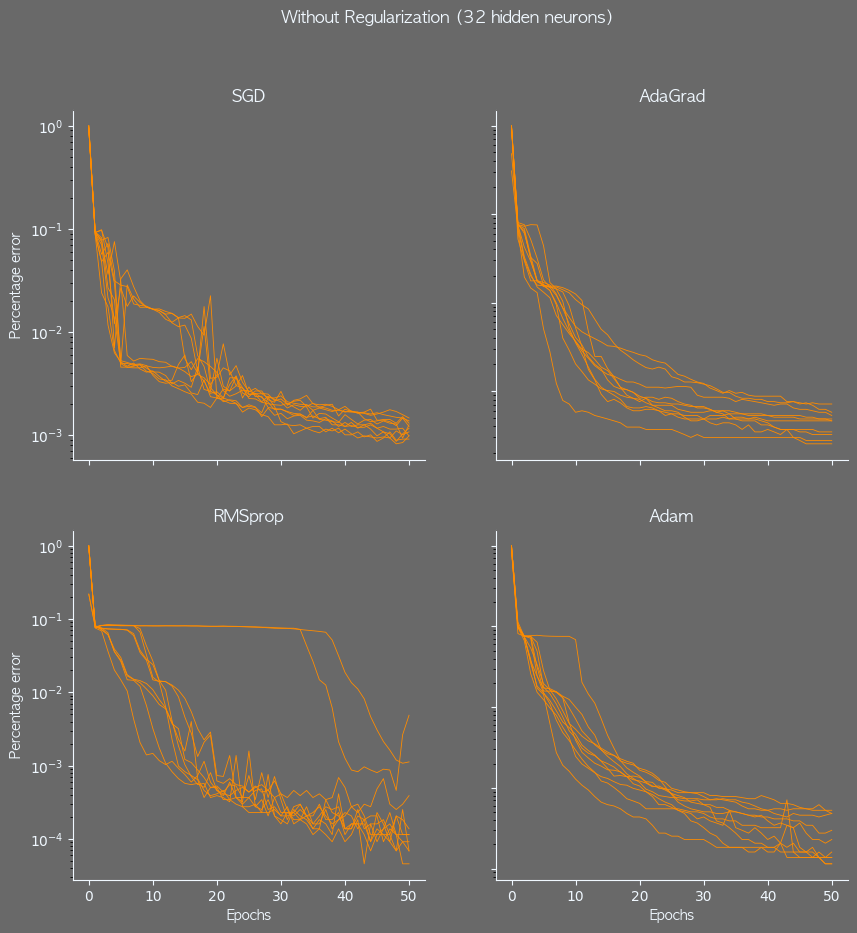

In [10]:
# Load all csv files
SGD_plot = np.loadtxt('SGD_13.csv', delimiter=',')
SGD_plot = SGD_plot.reshape((10,51))

AdaGrad_plot = np.loadtxt('Adagrad_13.csv', delimiter=',')
AdaGrad_plot = AdaGrad_plot.reshape((10,51))

RMSprop_plot = np.loadtxt('RMSprop_13.csv', delimiter=',')
RMSprop_plot = RMSprop_plot.reshape((10,51))

Adam_plot = np.loadtxt('Adam_13.csv', delimiter=',')
Adam_plot = Adam_plot.reshape((10,51))

names = ['Without Regularization (32 hidden neurons)','SGD','AdaGrad','RMSprop','Adam']
plots = np.array([SGD_plot,AdaGrad_plot,RMSprop_plot,Adam_plot])

subplots_acc_error(plots,names)

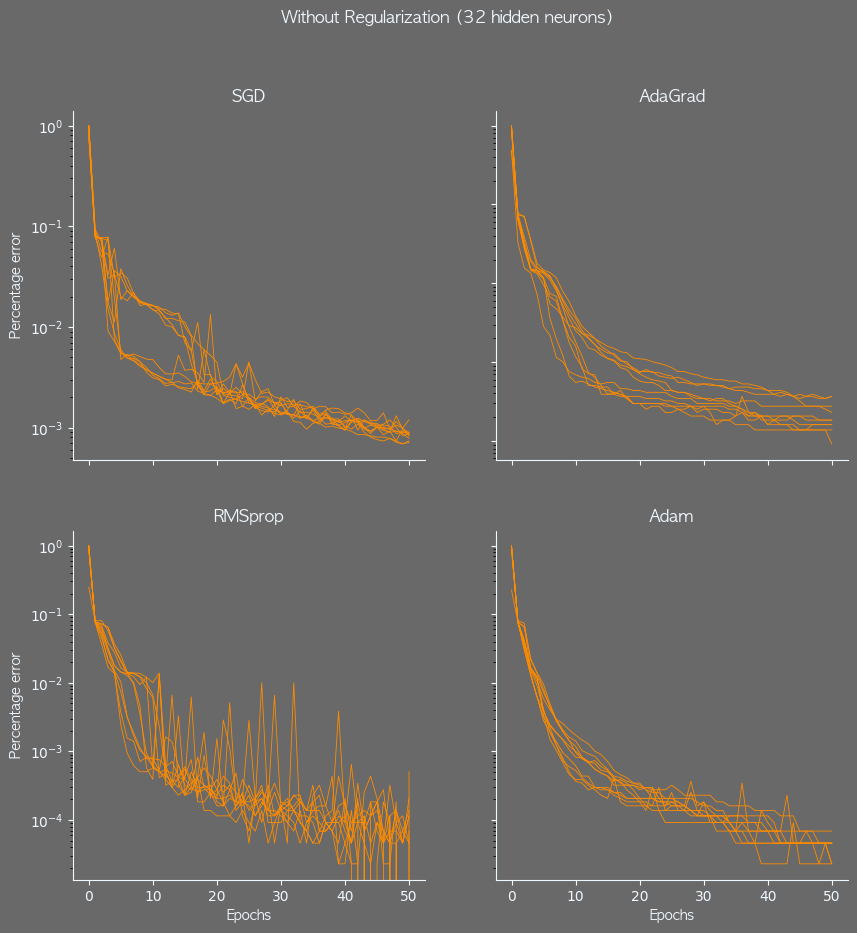

In [9]:
# Load all csv files
SGD_plot = np.loadtxt('SGD.csv', delimiter=',')
SGD_plot = SGD_plot.reshape((10,51))

AdaGrad_plot = np.loadtxt('Adagrad.csv', delimiter=',')
AdaGrad_plot = AdaGrad_plot.reshape((10,51))

RMSprop_plot = np.loadtxt('RMSprop.csv', delimiter=',')
RMSprop_plot = RMSprop_plot.reshape((10,51))

Adam_plot = np.loadtxt('Adam.csv', delimiter=',')
Adam_plot = Adam_plot.reshape((10,51))

names = ['Without Regularization (32 hidden neurons)','SGD','AdaGrad','RMSprop','Adam']
plots = np.array([SGD_plot,AdaGrad_plot,RMSprop_plot,Adam_plot])

subplots_acc_error(plots,names)

# $ \underline{\text{Testing Model on Unseen data}} $
$ \text{Takes Model object as input and calculates the loss and accuracy of the model}$

In [54]:
def test_model(model,method):
    # Forward pass
    model.input_layer.forward(batch_tst)
    model.activation1.forward(model.input_layer.output)
    model.layer2.forward(model.activation1.output)
    # Calculate loss
    loss = model.loss_activation.forward(model.layer2.output,classfy_tst)
    predictions = np.argmax(model.loss_activation.output,axis=1)
    accuracy = np.mean(predictions==classfy_tst)
    print(f'validation of {method} => acc:{accuracy:.3f},loss:{loss:.3f}')


In [35]:
test_model(SGD_trained,'SGD')
test_model(Ada_trained,'AdaGrad')
test_model(RMSprop_trained,'RMSprop')
test_model(Adam_trained,'Adam')

validation of SGD => acc:0.998,loss:0.010
validation of AdaGrad => acc:0.999,loss:0.006
validation of RMSprop => acc:0.998,loss:0.022
validation of Adam => acc:0.999,loss:0.005


# $ \underline{\text{Testing using Regularization}}  $
$ \text{We will compare using RMSprop and Adam since they are the best performing models. First we will use L1 and L2 regularization} $ <br>
$ \text{ and then we will implement a dropout layer. The result is what we expect, a drop in the model's accuracy. This is what we expect because } $ <br>
$ \text{Regularization is a means to reduce overfitting by reducing the dependancy on the training data and so would decrease the accuracy.}   $ 

In [ ]:
# RMSprop (L1 and L2)
RMSprop_reg, RMSprop_trained_reg = train_model(RMSProp)
RMSprop_reg.tofile('RMSprop_reg.csv',sep=',')
# Adam (L1 and L2)
Adam_reg, Adam_trained_reg = train_model(Adam)
Adam_reg.tofile('Adam_reg.csv',sep=',')
# RMSprop (Dropout)
RMSprop_reg, RMSprop_trained_reg_drop = train_model(RMSProp)
RMSprop_reg.tofile('RMSprop_reg_drop.csv',sep=',')
# Adam (Dropout)
Adam_reg_drop, Adam_trained_reg_drop = train_model(Adam)
Adam_reg_drop.tofile('Adam_reg_drop.csv',sep=',')

In [13]:
# Load all csv files
RMSprop_plot_1 = np.loadtxt('RMSprop_reg.csv', delimiter=',')
RMSprop_plot_1 = RMSprop_plot_1.reshape((10,51))

Adam_plot_1 = np.loadtxt('Adam_reg.csv', delimiter=',')
Adam_plot_1 = Adam_plot_1.reshape((10,51))

RMSprop_plot_2 = np.loadtxt('RMSprop_reg_drop.csv', delimiter=',')
RMSprop_plot_2 = RMSprop_plot_2.reshape((10,51))

Adam_plot_2 = np.loadtxt('Adam_reg_drop.csv', delimiter=',')
Adam_plot_2 = Adam_plot_2.reshape((10,51))

# Create plot
names = ['Top: L1 & L2 Regularization, Bottom: Dropout (32 hidden neurons)','RMSprop','Adam','RMSprop','Adam']
plots = np.array([RMSprop_plot_1,Adam_plot_1,RMSprop_plot_2,Adam_plot_2])
subplots_acc_error(plots,names)

FileNotFoundError: RMSprop_reg.csv not found.

In [57]:
test_model(RMSprop_trained_reg,'RMSprop (L1 & L2 regularization)')
test_model(Adam_trained_reg,'Adam (L1 & L2 regularization)')
test_model(RMSprop_trained_reg_drop,'RMSprop (Dropout)')
test_model(Adam_trained_reg_drop,'Adam (Dropout')

validation of Adam (L1 & L2 regularization) => acc:0.998,loss:0.010


NameError: name 'Adam_trained_reg_drop' is not defined